In [1]:
# load data
import pandas as pd
df = pd.read_csv("./Data/SortedPOIs.csv")
TOTAL = len(df)+1
COL = df.columns
print(TOTAL) # 1157569

1157571


In [12]:
from sklearn import neural_network
import ipdb
import time

stages = [1,20,50]
index = []
data = []

start_time=time.time()

for i in range(len(stages)):
    temp = []
    for j in range(stages[i]):
        df_ = pd.DataFrame(columns=COL)
        temp.append(df_)
    data.append(temp)
    
data[0][0] = df

for i in range(len(stages)):
    temp = []
    print("======stage:"+str(i)+"======")
    for j in range(stages[i]):
        print("model:"+str(j))
        nn = neural_network.MLPRegressor(hidden_layer_sizes=(16, 2),max_iter=1000)
        train_x = data[i][j].iloc[:,0:2]
        train_y = data[i][j].iloc[:,2]
        nn.fit(train_x,train_y)
        temp.append(nn)
        # allocate data
        if i < len(stages)-1:
            predicted = nn.predict(train_x)
            for pi in range(len(predicted)): # do not change the prediction
                #print(item)
                if predicted[pi] < 0:
                    predicted[pi] = 0
                if predicted[pi] >= TOTAL:
                    predicted[pi] = TOTAL-1   
            ModelID = ((predicted/TOTAL)*stages[i+1]).astype(int)
            data[i][j].iloc[:,3]=ModelID
            for k in range(stages[i+1]):
                data[i+1][k] = data[i+1][k].append(data[i][j].loc[data[i][j]['prediction'] == k])
#             too slow!
#             for k in range(len(ModelID)):
#                 data[i+1][ModelID[k]].loc[data[i+1][ModelID[k]].size/3]=data[i][j].iloc[k,:]
#                 if k % 1000 == 0:
#                     print(k)
    index.append(temp)

elapsed_time = time.time() - start_time
print(elapsed_time)

======stage:0======
model:0
======stage:1======
model:0
model:1
model:2
model:3
model:4
model:5
model:6


D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


model:7
model:8
model:9
model:10
model:11
model:12
model:13
model:14
model:15
model:16
model:17
model:18
model:19
======stage:2======
model:0
model:1
model:2
model:3
model:4
model:5
model:6
model:7
model:8
model:9
model:10
model:11
model:12
model:13
model:14
model:15
model:16
model:17
model:18
model:19
model:20
model:21
model:22
model:23
model:24
model:25
model:26
model:27
model:28
model:29
model:30
model:31
model:32
model:33
model:34
model:35
model:36
model:37
model:38
model:39
model:40
model:41
model:42
model:43
model:44
model:45
model:46
model:47
model:48
model:49
2416.946166753769


In [4]:
import numpy as np
# use the generated stage index for prediction
def predict_with_stage_model(model, data):
    totalSize = len(data)+1
    predicted_y = []
    tempy = 0
    for i in range(len(data)):
        modelIndex = 0
        for m in range(len(model)):
            tempy = model[m][modelIndex].predict(data.iloc[i,:].reshape(1,-1))
            if tempy < 0:
                tempy = 0
            if tempy >= totalSize:
                tempy = totalSize-1
            if m < len(model)-1:
                modelIndex = int((tempy/totalSize)*len(model[m+1]))
                
        predicted_y.append(tempy)
        
    return predicted_y

In [5]:
print(index)
print(len(temp))

[[MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(16, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)], [MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(16, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False), MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsi

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


541.6303420066833


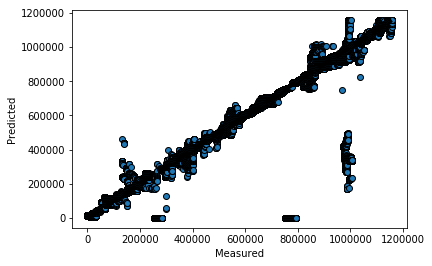

In [11]:
import matplotlib.pyplot as plt
import time

train_x=df.iloc[:,0:2]
train_y=df.iloc[:,2]
start_time=time.time()
predicted_y = predict_with_stage_model(index, train_x)
elapsed_time = time.time() - start_time
print(elapsed_time)

fig, ax = plt.subplots()
ax.scatter(train_y, predicted_y, edgecolors=(0, 0, 0))
ax.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [10]:
# estimate the result
from sklearn.metrics import explained_variance_score

# 1- Var(Ytrue - Ypred)/Var(Ytrue)  best: 1  the lower the worse
result = explained_variance_score(train_y, predicted_y)
print(result)

# calculate scan item amount
ind = 0
scan = 0
totalscan = 0
for i in range(len(df)):
    ind = predicted_y[i]
    scan = abs(ind-i) # distance to exact
    totalscan += scan

print(totalscan/len(df))

ValueError: Found input variables with inconsistent numbers of samples: [14012, 1157570]